In [356]:
import os
import re
import shutil
import jieba
jieba.enable_parallel() # jieba支持多进程
import time
import numpy as np

In [8]:
category_labels = {
    'C000008': '_08_Finance',
    'C000010': '_10_IT',
    'C000013': '_13_Health',
    'C000014': '_14_Sports',
    'C000016': '_16_Travel',
    'C000020': '_20_Education',
    'C000022': '_22_Recruit',
    'C000023': '_23_Culture',
    'C000024': '_24_Military'
}

In [23]:
token = "[0-9\s+\.\!\/_,$%^*()?;；：【】+\"\'\[\]\\]+|[+——！，;:。？《》、~@#￥%……&*（）“”.=-]+"
stopwords = set(open('dict/stop_words.txt', encoding='utf-8').read().split()) # 停用词

# 基于scikit-learn机器学习的文本分类方法
## 语料预处理

In [22]:
# original data directory
original_dataset_dir = './CN_Corpus'
base_dir = 'data/'

# make new folders
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# split corpus
for cate in os.listdir(original_dataset_dir):
    cate_dir = os.path.join(original_dataset_dir, cate)
    file_list = os.listdir(cate_dir)
    print("cate: {}, len: {}".format(cate, len(file_list)))

    # train data
    fnames = file_list[:1500] 
    dst_dir = os.path.join(train_dir, category_labels[cate])
    os.mkdir(dst_dir)
    print("dst_dir: {}, len: {}".format(dst_dir, len(fnames)))
    for fname in fnames:
        src = os.path.join(cate_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src, dst)

    # test data
    fnames = file_list[1500:] 
    dst_dir = os.path.join(test_dir, category_labels[cate])
    os.mkdir(dst_dir)
    print("dst_dir: {}, len: {}".format(dst_dir, len(fnames)))
    for fname in fnames:
        src = os.path.join(cate_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src, dst)
print('Corpus split DONE.')

cate: C000008, len: 1990
dst_dir: data/train/_08_Finance, len: 1500
dst_dir: data/test/_08_Finance, len: 490
cate: C000014, len: 1990
dst_dir: data/train/_14_Sports, len: 1500
dst_dir: data/test/_14_Sports, len: 490
cate: C000013, len: 1990
dst_dir: data/train/_13_Health, len: 1500
dst_dir: data/test/_13_Health, len: 490
cate: C000022, len: 1990
dst_dir: data/train/_22_Recruit, len: 1500
dst_dir: data/test/_22_Recruit, len: 490
cate: C000023, len: 1990
dst_dir: data/train/_23_Culture, len: 1500
dst_dir: data/test/_23_Culture, len: 490
cate: C000024, len: 1990
dst_dir: data/train/_24_Military, len: 1500
dst_dir: data/test/_24_Military, len: 490
cate: C000010, len: 1990
dst_dir: data/train/_10_IT, len: 1500
dst_dir: data/test/_10_IT, len: 490
cate: C000020, len: 1990
dst_dir: data/train/_20_Education, len: 1500
dst_dir: data/test/_20_Education, len: 490
cate: C000016, len: 1990
dst_dir: data/train/_16_Travel, len: 1500
dst_dir: data/test/_16_Travel, len: 490
Corpus split DONE.


## 划分训练集与测试集

In [3]:
def preprocess(text):
    text1 = re.sub('&nbsp', ' ', text)
    str_no_punctuation = re.sub(token, ' ', text1)  # 去掉标点
    text_list = list(jieba.cut(str_no_punctuation))   # 分词列表
    text_list = [item for item in text_list if item != ' '] # 去掉空格
    return ' '.join(text_list)

In [ ]:
def load_datasets():
    base_dir = 'data/'
    X_data = {'train':[], 'test':[]}
    y = {'train':[], 'test':[]}
    for type_name in ['train', 'test']:
        corpus_dir = os.path.join(base_dir, type_name)
        for label in os.listdir(corpus_dir):
            label_dir = os.path.join(corpus_dir, label)
            file_list = os.listdir(label_dir)
            print("label: {}, len: {}".format(label, len(file_list)))

            for fname in file_list:
                file_path = os.path.join(label_dir, fname)
                with open(file_path, encoding='gb2312', errors='ignore') as text_file:
                    text_content = preprocess(text_file.read())
                X_data[type_name].append(text_content)
                y[type_name].append(label)

        print("{} corpus len: {}\n".format(type_name, len(X_data[type_name])))
    
    return X_data['train'], y['train'], X_data['test'], y['test']

In [75]:
X_train_data, y_train, X_test_data, y_test = load_datasets()

label: _16_Travel, len: 1500
label: _13_Health, len: 1500
label: _23_Culture, len: 1500
label: _20_Education, len: 1500
label: _08_Finance, len: 1500
label: _22_Recruit, len: 1500
label: _10_IT, len: 1500
label: _14_Sports, len: 1500
label: _24_Military, len: 1500
train corpus len: 13500

label: _16_Travel, len: 490
label: _13_Health, len: 490
label: _23_Culture, len: 490
label: _20_Education, len: 490
label: _08_Finance, len: 490
label: _22_Recruit, len: 490
label: _10_IT, len: 490
label: _14_Sports, len: 490
label: _24_Military, len: 490
test corpus len: 4410



In [194]:
X_train_data[3000], y_train[3000]

('四月 物语 ― ― 暗恋 一种 幸福 寂寞 樱花 飘落 骑着 单车 寂寞 日常生活 上学 买 书 电影 做饭 这是 岩井 四月 物语 榆野 那种 富于 教养 略带 拘谨 羞涩 爱 孤独 中 沉静 姿态 零碎 单调 音乐 静静 流淌 爱 驱动力 强大 寂寂 无名 榆野 见到 心仪 对象 考取 著名 大学 称之为 爱 奇迹 细节 中规中矩 一丝不苟 少女 内心 投射 回忆 幸福 预谋 无意识 中 发生 一点点 矜持 悸动 分 巨细 表达出来 一部 无微不至 影音 日志 如诗如画 平淡 生活 场景 中 一种 感觉 抛弃 纷繁 芜杂 喧嚣 吵闹 留给 明净 四月 天空 一页 一页',
 '_23_Culture')

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [195]:
wordcloud = WordCloud(scale=4,
                      font_path='simhei.ttf',
                      background_color='white',
                      max_words = 100,
                      max_font_size = 60,
                      random_state=20).generate(X_train_data[3000])

(-0.5, 1599.5, 799.5, -0.5)

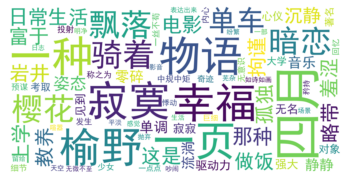

In [196]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## TF-IDF文本特征提取

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
# TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_data)
words = tfidf_vectorizer.get_feature_names()

In [355]:
words[-100:]

['龙腾渊',
 '龙腾路',
 '龙舌兰',
 '龙舞',
 '龙舟',
 '龙舟节',
 '龙舟赛',
 '龙船',
 '龙船调',
 '龙节',
 '龙芯',
 '龙苗',
 '龙葵',
 '龙虎',
 '龙虎山',
 '龙虎斗',
 '龙虎榜',
 '龙虾',
 '龙蛇混杂',
 '龙蟠',
 '龙蟠路',
 '龙袍',
 '龙袜',
 '龙说',
 '龙象',
 '龙财',
 '龙超峰',
 '龙道畴',
 '龙钟老态',
 '龙门',
 '龙门客栈',
 '龙门山',
 '龙门石窟',
 '龙门阵',
 '龙阳',
 '龙阳路',
 '龙隐寺',
 '龙青雾',
 '龙韬',
 '龙音',
 '龙顶冈',
 '龙须面',
 '龙颜',
 '龙颜大悦',
 '龙飞',
 '龙飞凤舞',
 '龙饰',
 '龙首',
 '龙马',
 '龙骑士',
 '龙骧',
 '龙骨',
 '龙魂',
 '龙鱼',
 '龙鳞饼',
 '龙齿',
 '龚伟',
 '龚传文',
 '龚先生',
 '龚古尔',
 '龚喜燕',
 '龚嘴',
 '龚在',
 '龚妍奇',
 '龚家',
 '龚小莉',
 '龚常',
 '龚建国',
 '龚开',
 '龚强',
 '龚扇',
 '龚文标',
 '龚断',
 '龚方雄',
 '龚明俊',
 '龚晓犁',
 '龚晓跃',
 '龚杰',
 '龚松林',
 '龚某',
 '龚湘',
 '龚自珍',
 '龚虹嘉',
 '龚谷成',
 '龚震林',
 '龚静',
 '龟兹王',
 '龟凤汤',
 '龟城',
 '龟头',
 '龟山',
 '龟岛',
 '龟文',
 '龟板',
 '龟田',
 '龟缩',
 '龟背',
 '龟蛇同',
 '龟裂',
 '龟鳖']

## 构建分类器
### 朴素贝叶斯分类器MultinomialNB

In [125]:
# Pipeline
mnb_clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

%time mnb_clf.fit(X_train_data, y_train)

CPU times: user 4.4 s, sys: 134 ms, total: 4.54 s
Wall time: 4 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [182]:
mnb_score = mnb_clf.score(X_test_data, y_test)
mnb_score

0.8741496598639455

In [126]:
y_pre_mnb = text_clf.predict(X_test_data)
print(classification_report(y_pre_mnb, y_test))

               precision    recall  f1-score   support

  _08_Finance       0.88      0.90      0.89       477
       _10_IT       0.81      0.87      0.84       461
   _13_Health       0.82      0.90      0.86       451
   _14_Sports       0.98      1.00      0.99       480
   _16_Travel       0.89      0.91      0.90       480
_20_Education       0.84      0.87      0.85       472
  _22_Recruit       0.90      0.73      0.80       606
  _23_Culture       0.80      0.83      0.82       476
 _24_Military       0.94      0.91      0.92       507

     accuracy                           0.87      4410
    macro avg       0.87      0.88      0.87      4410
 weighted avg       0.88      0.87      0.87      4410



In [127]:
confusion_matrix(y_pre_mnb, y_test)

array([[429,  18,  10,   2,   4,   3,   3,   7,   1],
       [ 31, 399,   7,   5,   7,   3,   5,   4,   0],
       [  3,   9, 404,   0,   5,   9,  10,  10,   1],
       [  0,   1,   0, 478,   0,   0,   0,   1,   0],
       [  4,  13,   1,   1, 438,   3,   5,  14,   1],
       [  3,  10,   6,   2,   2, 411,  18,  10,  10],
       [  7,  17,  57,   2,   8,  44, 441,  29,   1],
       [  7,   9,   5,   0,  23,  15,   8, 394,  15],
       [  6,  14,   0,   0,   3,   2,   0,  21, 461]])

### 逻辑回归LR

In [130]:
# Logistic Regression
lr_clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])

%time lr_clf.fit(X_train_data, y_train)

/Users/aeternae/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aeternae/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 20.9 s, sys: 305 ms, total: 21.2 s
Wall time: 8.16 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [183]:
lr_score = lr_clf.score(X_test_data, y_test)
lr_score

0.898639455782313

In [138]:
y_pre_lr = lr_clf.predict(X_test_data)
print(classification_report(y_pre_lr, y_test))

               precision    recall  f1-score   support

  _08_Finance       0.86      0.94      0.90       451
       _10_IT       0.86      0.87      0.86       484
   _13_Health       0.91      0.90      0.90       496
   _14_Sports       0.98      0.99      0.99       485
   _16_Travel       0.91      0.92      0.91       484
_20_Education       0.86      0.91      0.88       464
  _22_Recruit       0.88      0.87      0.88       495
  _23_Culture       0.87      0.77      0.82       552
 _24_Military       0.96      0.94      0.95       499

     accuracy                           0.90      4410
    macro avg       0.90      0.90      0.90      4410
 weighted avg       0.90      0.90      0.90      4410



In [141]:
confusion_matrix(y_pre_lr, y_test)

array([[422,  10,   7,   0,   3,   3,   2,   4,   0],
       [ 38, 421,   7,   4,   2,   3,   6,   3,   0],
       [  5,   9, 445,   0,   6,  11,  11,   8,   1],
       [  0,   2,   0, 482,   1,   0,   0,   0,   0],
       [  6,  11,   3,   1, 445,   3,   5,   9,   1],
       [  0,  10,   4,   0,   2, 422,  12,  12,   2],
       [  3,   5,  16,   1,   2,  26, 431,  11,   0],
       [  9,  15,   8,   2,  28,  22,  23, 427,  18],
       [  7,   7,   0,   0,   1,   0,   0,  16, 468]])

### SVM

In [143]:
# SVM
svm_clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2')),
])

%time svm_clf.fit(X_train_data, y_train)

CPU times: user 7.2 s, sys: 142 ms, total: 7.34 s
Wall time: 4.71 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [184]:
svm_score = svm_clf.score(X_test_data, y_test)
svm_score

0.9183673469387755

In [167]:
y_pre_svm = svm_clf.predict(X_test_data)
print(classification_report(y_pre_svm, y_test))

               precision    recall  f1-score   support

  _08_Finance       0.87      0.95      0.91       449
       _10_IT       0.86      0.89      0.88       474
   _13_Health       0.92      0.91      0.92       495
   _14_Sports       1.00      0.99      0.99       493
   _16_Travel       0.94      0.92      0.93       501
_20_Education       0.88      0.92      0.90       472
  _22_Recruit       0.93      0.89      0.91       515
  _23_Culture       0.89      0.85      0.87       512
 _24_Military       0.96      0.95      0.95       499

     accuracy                           0.92      4410
    macro avg       0.92      0.92      0.92      4410
 weighted avg       0.92      0.92      0.92      4410



In [169]:
confusion_matrix(y_pre_svm, y_test)

array([[428,   8,   3,   0,   3,   4,   2,   1,   0],
       [ 33, 423,   5,   1,   2,   3,   4,   3,   0],
       [  5,  10, 452,   0,   5,   9,   6,   7,   1],
       [  0,   2,   1, 488,   1,   1,   0,   0,   0],
       [  5,  10,   2,   1, 463,   2,   4,  13,   1],
       [  1,  12,   7,   0,   2, 432,   4,  12,   2],
       [  3,   6,  13,   0,   1,  23, 457,  12,   0],
       [  7,  10,   5,   0,  12,  16,  13, 435,  14],
       [  8,   9,   2,   0,   1,   0,   0,   7, 472]])

## 模型评估与比较

In [175]:
news_lastest = ["8月27日晚间，北京首钢篮球俱乐部官方宣布，正式与美籍华裔球员林书豪签约，林书豪将以外援身份，代表北京首钢队参加CBA联赛。同一时间，林书豪也在微博宣布：北京，我来了。过去9年时间里，华人林书豪在NBA经历了跌宕起伏的篮球生涯。从哈佛小子，到首位进入NBA的美籍华裔球员，再到千万身家的“林疯狂……与此同时，林书豪在国内获得了远高于在NBA的关注。",
                "在25日举行的七国工业国集团（G7）峰会上，美国总统特朗普在谈及朝鲜问题时重申近期朝鲜试射武器未违反协定，并指美韩军演是浪费金钱。据路透社报道，特朗普25日在与日本首相安倍晋三举行会谈时，谈及朝鲜问题。特朗普称他对朝鲜多次试射感到不满，但称发射“不违反任何协定”。",
                "8月14日，清华大学交叉信息院正式迎来了85名九字班新生。根据其官网的名单公示：今年5月18日校园开放日宣布成立的人工智能学堂班（简称智班）已完成了首次选拔，共录取30人。共有55名新生入学姚班。"]
X_new_data = [preprocess(doc) for doc in news_lastest]

In [174]:
mnb_clf.predict(X_new_data)

array(['_14_Sports', '_24_Military', '_20_Education'], dtype='<U13')

In [177]:
lr_clf.predict(X_new_data)

array(['_14_Sports', '_24_Military', '_20_Education'], dtype='<U13')

In [178]:
svm_clf.predict(X_new_data)

array(['_14_Sports', '_24_Military', '_14_Sports'], dtype='<U13')

(0.85, 0.92)

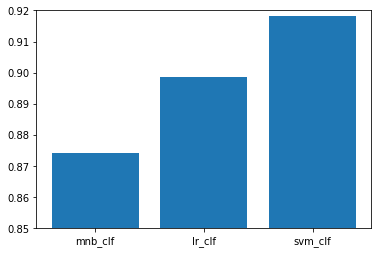

In [192]:
x_clf = ['mnb_clf', 'lr_clf', 'svm_clf']
y_clf = [mnb_score, lr_score, svm_score]
plt.bar(x_clf, y_clf)
plt.ylim(0.85, 0.92)

# 基于神经网络模型的文本分类方法

In [197]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Embedding, Input

Using TensorFlow backend.


## 语料读取

In [198]:
def preprocess_keras(text):
    text1 = re.sub('&nbsp', ' ', text)
    str_no_punctuation = re.sub(token, ' ', text1)  # 去掉标点
    text_list = list(jieba.cut(str_no_punctuation))   # 分词列表
    text_list = [item for item in text_list if item != ' ' and item not in stopwords] # 去掉空格和停用词
    return ' '.join(text_list)

In [199]:
labels_index = {} # 记录分类标签的序号
def load_raw_datasets():    
    labels = []
    texts = []
    base_dir = './CN_Corpus'
    t1 = time.time()
    for cate_index, label in enumerate(os.listdir(base_dir)):
        label_dir = os.path.join(base_dir, label)
        file_list = os.listdir(label_dir)
        labels_index[label] = cate_index # 记录分类标签的整数标号
        print("label: {}, len: {}".format(label, len(file_list)))

        for fname in file_list:
            f = open(os.path.join(label_dir, fname), encoding='gb2312', errors='ignore')
            texts.append(preprocess_keras(f.read()))
            f.close()
            labels.append(labels_index[label])
            
    t2 = time.time()
    tm_cost = t2-t1
    print('\nDone. {} total categories, {} total docs. cost {} seconds.'.format(len(os.listdir(base_dir)), len(texts), tm_cost))
    return texts, labels

In [202]:
texts, labels = load_raw_datasets()

label: C000008, len: 1990
label: C000014, len: 1990
label: C000013, len: 1990
label: C000022, len: 1990
label: C000023, len: 1990
label: C000024, len: 1990
label: C000010, len: 1990
label: C000020, len: 1990
label: C000016, len: 1990

Done. 9 total categories, 17910 total docs. cost 101.7540500164032 seconds.


In [205]:
texts[3000], labels[3000]

('本报讯 女足 国青队 马来西亚 夺得 亚青赛 冠军 奖金 中国足协 改革 国字号 球队 奖金 制度 男足 女足 同酬 参加 级别 正式 赛事 奖金 月份 澳大利亚 女足 亚洲杯 马良行 率领 中国队 夺得 冠军 奖金 中国足协 奖金 制度 国字号 女足 奖金 男足 较大 差距 男足 国青队 亚青赛 冠军 奖金 男足 国少队 亚洲 冠军 奖金 女足 国青队 世青赛 亚军 男足 亚洲 成绩 奖金 数目 谢亚龙 阎世铎 时代 奖金 制度 改革 男女 足 同酬 女足 国青队 本届 亚青赛 冠军 提高 上报 总局 审批 女足 国青队 奖金 球队 瓜分 照顾 关联 单位 中国足协 制定 奖金 分配制度 女足 国青队 奖金 中 ％ 奖励 女足 国青队 教练组 球员 ％ 奖励 做 工作 人员 ％ 奖励 输送 球员 女足 国青队 单位 这是 谢亚龙 奖金 分配制度 改革 中国足协 男女 足 国家队 主教练 薪水 提高 每月 集训 期间 教练员 津贴 元 男女 足 国青队 主教练 薪水 提高 每月 教练员 津贴 元 中国足协 大幅度提高 国字号 教练 待遇 目的 调动 积极性 待遇 过低 国字号 球队 任职 情况 □ 京君',
 1)

In [225]:
labels_index.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [216]:
labels_index, category_labels

({'C000008': 0,
  'C000014': 1,
  'C000013': 2,
  'C000022': 3,
  'C000023': 4,
  'C000024': 5,
  'C000010': 6,
  'C000020': 7,
  'C000016': 8},
 {'C000008': '_08_Finance',
  'C000010': '_10_IT',
  'C000013': '_13_Health',
  'C000014': '_14_Sports',
  'C000016': '_16_Travel',
  'C000020': '_20_Education',
  'C000022': '_22_Recruit',
  'C000023': '_23_Culture',
  'C000024': '_24_Military'})

## 语料预处理
### 将文本转化为词向量矩阵

In [214]:
MAX_SEQUENCE_LEN = 1000  # sequence length
MAX_WORDS_NUM = 20000    # max words
VAL_SPLIT_RATIO = 0.2    # ratio for validation

In [226]:
# process datasets by keras API

tokenizer = Tokenizer(num_words=MAX_WORDS_NUM)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LEN) 
# maxlen：序列的最大长度。大于此长度的序列将被截短，小于此长度的序列将在前部(默认)填0

In [242]:
word_index = tokenizer.word_index
print(len(word_index)) # all token found
word_index

263284


{'\x00': 1,
 '中': 2,
 '年': 3,
 '中国': 4,
 '月': 5,
 '公司': 6,
 '说': 7,
 '―': 8,
 '日': 9,
 '工作': 10,
 '时': 11,
 '发展': 12,
 '美国': 13,
 '做': 14,
 '企业': 15,
 '市场': 16,
 '新': 17,
 '时间': 18,
 '国家': 19,
 '记者': 20,
 '旅游': 21,
 '专业': 22,
 '情况': 23,
 '分': 24,
 '学生': 25,
 '元': 26,
 '里': 27,
 '一种': 28,
 '能力': 29,
 '北京': 30,
 '相关': 31,
 '社会': 32,
 '日本': 33,
 '考生': 34,
 '学校': 35,
 '前': 36,
 '高': 37,
 '技术': 38,
 '想': 39,
 '计划': 40,
 '文化': 41,
 '发现': 42,
 '生活': 43,
 '世界': 44,
 '孩子': 45,
 '提供': 46,
 '股东': 47,
 '选择': 48,
 '产品': 49,
 '研究': 50,
 '比赛': 51,
 '经济': 52,
 '影响': 53,
 '教育': 54,
 '管理': 55,
 '方式': 56,
 '包括': 57,
 '上海': 58,
 '％': 59,
 '国际': 60,
 '０': 61,
 '・': 62,
 '信息': 63,
 '参加': 64,
 '活动': 65,
 '历史': 66,
 'a': 67,
 '服务': 68,
 '专家': 69,
 '招生': 70,
 '投资': 71,
 '希望': 72,
 '有限公司': 73,
 '１': 74,
 '考试': 75,
 '占': 76,
 '系统': 77,
 '特别': 78,
 '提高': 79,
 '搜狐': 80,
 '学习': 81,
 '增加': 82,
 '网络': 83,
 '这是': 84,
 '发生': 85,
 '全国': 86,
 '股份': 87,
 '建设': 88,
 '内容': 89,
 '行业': 90,
 '国内': 91,
 '．': 92,
 '职业': 93,
 '人才

In [373]:
dict_swaped = lambda _dict: {val:key for (key, val) in _dict.items()}
word_dict = dict_swaped(word_index) # swap key-value

# convert from index to origianl doc
for index in data[0]:
    if index != 0:
        print(word_dict[index], end=' ')

本报 北京 月 日电 报道 导弹 团 传出 营 参谋长 提出 兵器 改进 方案 困扰 该团 兵器 设计 厂家 兵器 隐患 迎刃而解 赢得 官兵 专家 赞扬 几年 前 该团 列装 新型 防空 导弹 检验 性 实弹 中 几次 故障 影响 新型 武器 系统 战斗力 发挥 查找 兵器 隐患 兵器 研发 厂家 专家组 伴随 保障 跟踪 观察 故障 症结 难 察觉 始终 该团 前不久 实弹 演练 时 营 参谋长 调试 兵器 参数 过程 中 这一 分析 论证 果断 推定 战车 某项 编排 不当 系统 作战 程序 相互 冲突 影响 原因 大胆 提出 改进 方案 专家 程序 检测 肯定 看法 建议 该团 应急 措施 清除 故障 隐患 打出 长期 困扰 兵器 故障 终于 得以 解决 看似 偶然 艰辛 查找 武器 系统 隐患 实践 兵器 性能 记下 操作 心得 原因 逐一 推测 判断 排除 上万 组 计算机 数据 统计 筛选 分析 最终 顺利 得以 解决 

In [370]:
category_labels[dict_swaped(labels_index)[np.argmax(labels_categorical[0])]]

'_24_Military'

In [280]:
# 将类别向量转换为one-hot形式
labels_categorical = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels_categorical.shape)

Shape of data tensor: (17910, 1000)
Shape of label tensor: (17910, 9)


### 划分训练集与校验集

In [313]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels_categorical = labels_categorical[indices]

In [324]:
# split data by ratio
val_samples_num = int(VAL_SPLIT_RATIO * data.shape[0])
x_train = data[:-val_samples_num]
y_train = labels_categorical[:-val_samples_num]
x_val = data[-val_samples_num:]
y_val = labels_categorical[-val_samples_num:]

x_train.shape, x_val.shape

((14328, 1000), (3582, 1000))

In [357]:
x_train

array([[   0,    0,    0, ..., 1081, 2111,  218],
       [   0,    0,    0, ..., 3502,  508, 4917],
       [   0,    0,    0, ...,  193, 1287, 2759],
       ...,
       [   0,    0,    0, ...,  129,   31,  413],
       [   0,    0,    0, ...,  395, 3132,   46],
       [   0,    0,    0, ..., 4245, 1488,   23]], dtype=int32)

## 构建模型

### model 1 自己训练词权重向量

In [332]:
# 定义词嵌入矩阵
MAX_WORDS_NUM = 20000    # max words
MAX_SEQUENCE_LEN = 1000  # sequence length
EMBEDDING_DIM = 300      # embedding dimension

input_dim = x_train.shape[1]

In [376]:
model1 = Sequential()
model1.add(Embedding(input_dim=MAX_WORDS_NUM+1, 
                     output_dim=EMBEDDING_DIM, 
                     input_length=MAX_SEQUENCE_LEN))
model1.add(Flatten())
model1.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(len(labels_index), activation='softmax'))

In [334]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 300)         6000300   
_________________________________________________________________
flatten_2 (Flatten)          (None, 300000)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                19200064  
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 585       
Total params: 25,205,109
Trainable params: 25,205,109
Non-trainable params: 0
_________________________________________________________________


In [337]:
model1.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [338]:
history1 = model1.fit(x_train, 
                      y_train,
                      epochs=30,
                      batch_size=128,
                      validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 14328 samples, validate on 3582 samples
Epoch 1/30
14328/14328 [==============================] - 74s 5ms/step - loss: 1.6176 - acc: 0.6128 - val_loss: 0.3883 - val_acc: 0.8825
Epoch 2/30
14328/14328 [==============================] - 77s 5ms/step - loss: 0.1836 - acc: 0.9441 - val_loss: 0.3285 - val_acc: 0.9087
Epoch 3/30
14328/14328 [==============================] - 77s 5ms/step - loss: 0.0546 - acc: 0.9819 - val_loss: 0.3600 - val_acc: 0.9090
Epoch 4/30
14328/14328 [==============================] - 81s 6ms/step - loss: 0.0366 - acc: 0.9860 - val_loss: 0.3991 - val_acc: 0.9026
Epoch 5/30
14328/14328 [==============================] - 77s 5ms/step - loss: 0.0336 - acc: 0.9865 - val_loss: 0.4808 - val_acc: 0.9076
Epoch 6/30
14328/14328 [==============================] - 78s 5ms/step - loss: 0.0299 - acc: 0.9863 - val_loss: 0.6106 - val_acc: 0.8931
Epoch 7/30
14328/14328 [==============================] - 74s 5ms/step - loss: 0.

### model 2 加载预训练模型权重

In [207]:
def load_pre_trained():
    # load pre-trained embedding model
    embeddings_index = {}
    with open('./sgns.sogou.word') as f:
        _, embedding_dim = f.readline().split()    
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    print('Found %s word vectors, dimension %s' % (len(embeddings_index), embedding_dim))
    return embeddings_index

In [208]:
embeddings_index = load_pre_trained()

Found 364180 word vectors, dimension 300


In [327]:
# generate embedding matrix
embedding_matrix = np.zeros((MAX_WORDS_NUM+1, EMBEDDING_DIM)) # row 0 for 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < MAX_WORDS_NUM:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [339]:
# 在第一个模型基础上加载词嵌入矩阵，并将词嵌入矩阵设为不可训练
model2 = Sequential()
model2.add(Embedding(input_dim=MAX_WORDS_NUM+1, 
                     output_dim=EMBEDDING_DIM, 
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LEN,
                     trainable=False))
model2.add(Flatten())
model2.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(len(labels_index), activation='softmax'))

In [340]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 300)         6000300   
_________________________________________________________________
flatten_3 (Flatten)          (None, 300000)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                19200064  
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 585       
Total params: 25,205,109
Trainable params: 19,204,809
Non-trainable params: 6,000,300
_________________________________________________________________


In [341]:
model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [342]:
history2 = model2.fit(x_train, 
                      y_train,
                      epochs=10,
                      batch_size=128,
                      validation_data=(x_val, y_val))

Train on 14328 samples, validate on 3582 samples
Epoch 1/10
14328/14328 [==============================] - 36s 2ms/step - loss: 1.4167 - acc: 0.6799 - val_loss: 0.6633 - val_acc: 0.7984
Epoch 2/10
14328/14328 [==============================] - 38s 3ms/step - loss: 0.2968 - acc: 0.9234 - val_loss: 0.6250 - val_acc: 0.8409
Epoch 3/10
14328/14328 [==============================] - 36s 3ms/step - loss: 0.1220 - acc: 0.9698 - val_loss: 0.6039 - val_acc: 0.8590
Epoch 4/10
14328/14328 [==============================] - 36s 3ms/step - loss: 0.0720 - acc: 0.9795 - val_loss: 0.6405 - val_acc: 0.8610
Epoch 5/10
14328/14328 [==============================] - 36s 3ms/step - loss: 0.0625 - acc: 0.9828 - val_loss: 0.9981 - val_acc: 0.8319
Epoch 6/10
14328/14328 [==============================] - 36s 2ms/step - loss: 0.0603 - acc: 0.9833 - val_loss: 0.8529 - val_acc: 0.8518
Epoch 7/10
14328/14328 [==============================] - 40s 3ms/step - loss: 0.0486 - acc: 0.9863 - val_loss: 0.7012 - val_acc:

### model 3 使用CNN进行文本分类

In [343]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [344]:
embedding_layer = Embedding(input_dim=MAX_WORDS_NUM+1,
                            output_dim=EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LEN,
                            trainable=False)

In [345]:
sequence_input = Input(shape=(MAX_SEQUENCE_LEN, ), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

In [348]:
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(35)(x)  # global max pooling
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

In [349]:
model3 = Model(sequence_input, preds)

In [350]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 1000, 300)         6000300   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 996, 128)          192128    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 35, 128)           82048     
__________

In [351]:
model3.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['acc'])

In [352]:
history3 = model3.fit(x_train, 
                      y_train,
                      epochs=10,
                      batch_size=128,
                      validation_data=(x_val, y_val))

Train on 14328 samples, validate on 3582 samples
Epoch 1/10
14328/14328 [==============================] - 299s 21ms/step - loss: 1.0102 - acc: 0.6692 - val_loss: 0.4984 - val_acc: 0.8632
Epoch 2/10
14328/14328 [==============================] - 300s 21ms/step - loss: 0.4830 - acc: 0.8592 - val_loss: 0.4404 - val_acc: 0.8682
Epoch 3/10
14328/14328 [==============================] - 302s 21ms/step - loss: 0.3531 - acc: 0.8910 - val_loss: 0.3636 - val_acc: 0.8900
Epoch 4/10
14328/14328 [==============================] - 304s 21ms/step - loss: 0.2728 - acc: 0.9119 - val_loss: 0.4350 - val_acc: 0.8721
Epoch 5/10
14328/14328 [==============================] - 301s 21ms/step - loss: 0.2159 - acc: 0.9268 - val_loss: 0.3523 - val_acc: 0.8925
Epoch 6/10
14328/14328 [==============================] - 303s 21ms/step - loss: 0.1653 - acc: 0.9432 - val_loss: 0.3387 - val_acc: 0.8992
Epoch 7/10
14328/14328 [==============================] - 302s 21ms/step - loss: 0.1286 - acc: 0.9540 - val_loss: 0.5

## 模型评估与比较

In [377]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

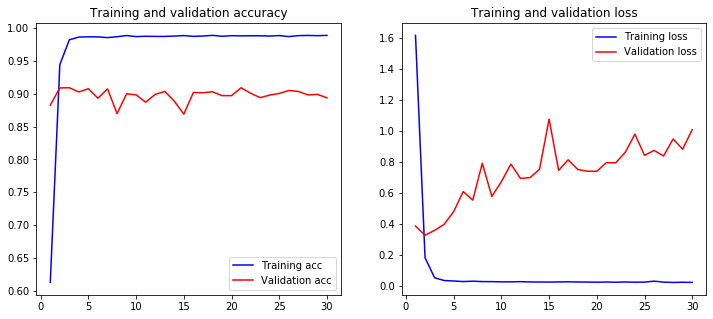

In [378]:
plot_history(history1)

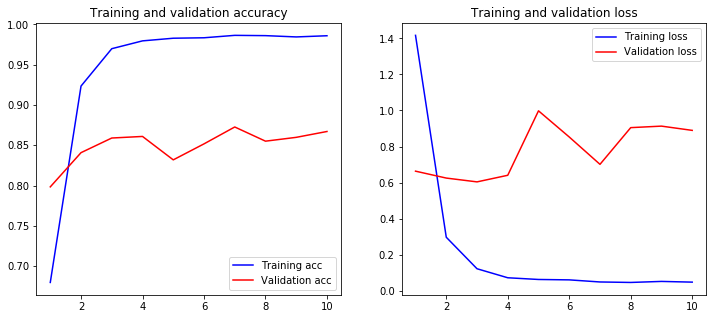

In [379]:
plot_history(history2)

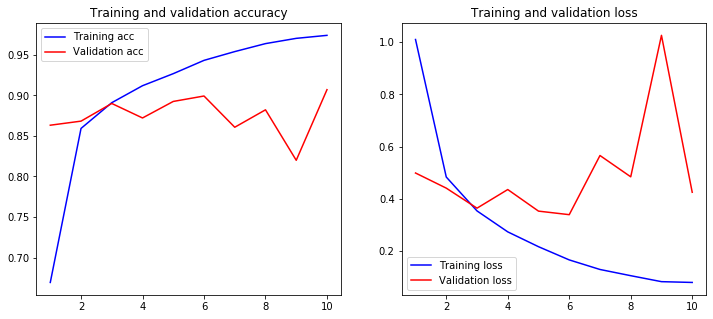

In [380]:
plot_history(history3)